In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

In [109]:
df = pd.read_csv('C:/Users/User/Desktop/Securities.csv')
df.groupby("Date").head(10)

,Date,Rank,Name,Number of shares traded,Volume,Opening price,Highest price,Lowest price,Closing price
0,0109年04月27日,1,00677U 富邦VIX,285394131,"27,858",7.51,7.59,7.33,7.34
1,0109年04月27日,2,00632R 元大台灣50反1,203253886,"19,552",10.80,10.85,10.65,10.65
2,0109年04月27日,3,3481 群創,184171547,"25,736",6.22,6.54,6.20,6.43
3,0109年04月27日,4,2409 友達,158916330,"25,593",7.60,8.13,7.51,7.97
4,0109年04月27日,5,2303 聯電,121440284,"17,083",16.15,16.30,15.90,16.15
...,...,...,...,...,...,...,...,...,...
345,0109年05月21日,6,2368 金像電,49379190,"15,936",32.90,34.20,32.90,33.65
346,0109年05月21日,7,00637L 元大滬深300正2,49219450,"3,210",16.36,16.43,16.26,16.27
347,0109年05月21日,8,2409 友達,46618898,"8,384",7.70,7.84,7.67,7.73
348,0109年05月21日,9,2449 京元電子,46274456,"21,867",31.10,32.35,31.10,32.30


<BarContainer object of 10 artists>

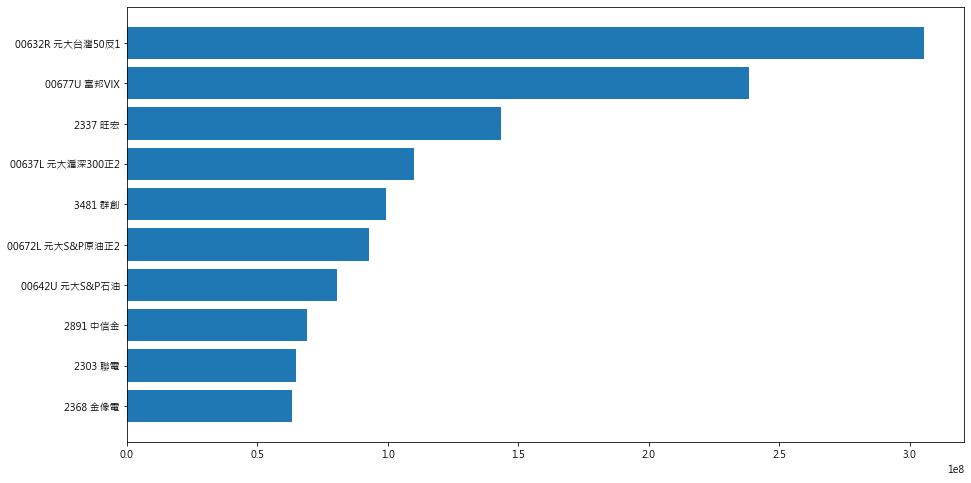

In [110]:
basic = df[df['Date']=='0109年04月30日'].sort_values('Number of shares traded').tail(10)
fig, ax = plt.subplots(figsize=(15, 8)) 
ax.barh(basic['Name'], basic['Number of shares traded'])

In [111]:
colors = dict(zip(
    ["00677U 富邦VIX", "00632R 元大台灣50反1", "3481 群創", "2409 友達", "2303 聯電", "2448 晶電", "00637L 元大滬深300正2","2368 金像電","2337 旺宏","00672L 元大S&P原油正2",
     "9919 康那香","2891 中信金","6251 定穎","2888 新光金","00642U 元大S&P石油","2330 台積電","2327 國巨","2492 華新科","2892 第一金",
     '2312 金寶','2610 華航','2618 長榮航','3037 欣興','2367 燿華','1402 遠東新','5471 松翰','4142 國光生','2317 鴻海','2614 東森','3545 敦泰','2885 元大金','2313 華通','2323 中環','2349 錸德','2884 玉山金','2449 京元電子','2603 長榮','3706 神達','2363 矽統'],
    ["#2E86AB", "#424B54", "#00A6A6", "#F24236", "#9E643C", "#f7bb5f", "#EDE6F2","#E9D985", "#8C4843", "#90d595", "#e48381", "#090446", "#f7bb5f", "#eafb50","#adb0ff",
     "#ffb3ff", "#90d595", "#e48381", "#aafbff",'#746D75','#660066','#663300','#666633','#336600','#336699','#3333FF','#CC0099','#FF0000','#3333CC','#CC6600','#00CCFF','#0066FF','#3333CC','#333399','#339933','#00CC66','#009999','#33CCCC','#0099FF']
))

0 63422149 2368 金像電
1 64768656 2303 聯電
2 69091028 2891 中信金
3 80454648 00642U 元大S&P石油
4 92829338 00672L 元大S&P原油正2
5 99297151 3481 群創
6 110014750 00637L 元大滬深300正2
7 143263270 2337 旺宏
8 238209000 00677U 富邦VIX
9 305482404 00632R 元大台灣50反1


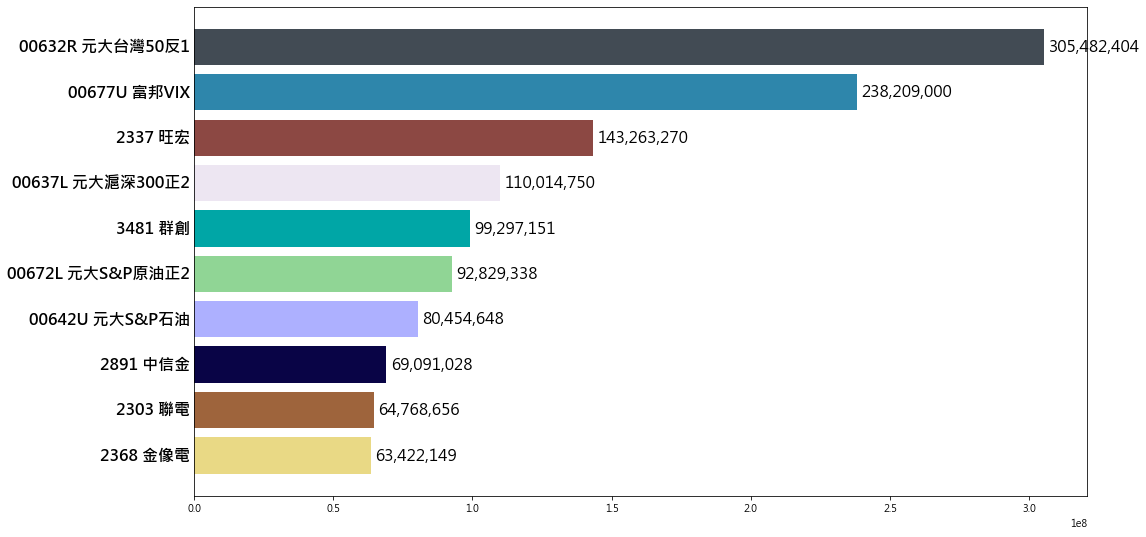

In [112]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.clear() 
def race_barchart(input_year):
    dff = df[df['Date'].eq(input_year)].sort_values(by='Number of shares traded', ascending=True).tail(10)
    ax.clear() 
    ax.set_yticks([]) 
    ax.barh(dff['Name'], dff['Number of shares traded'], color=[colors[x] for x in dff['Name']],height=0.8)
    dx = dff['Number of shares traded'].max() / 200
    
    for i, (value, name) in enumerate(zip(dff['Number of shares traded'], dff['Name'])):
        ax.text(0, i,name+' ',size=16, weight=600, ha='right', va='center')
        ax.text(value+dx, i,f'{value:,.0f}',  size=16, ha='left',  va='center')
        print(i, value, name)    

  
race_barchart('0109年04月30日')

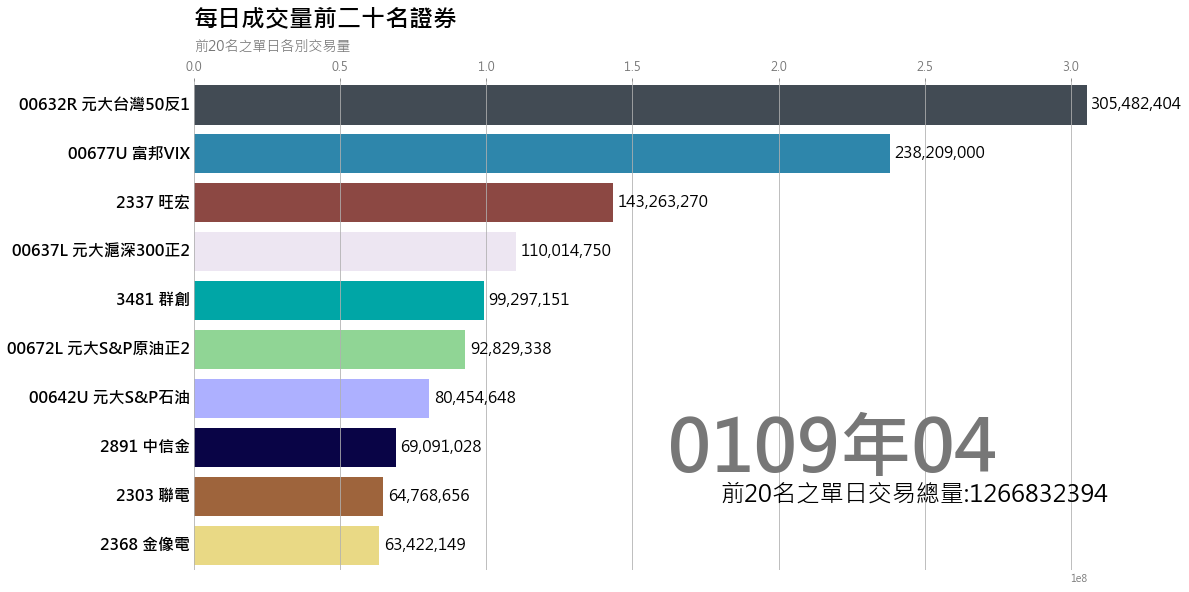

In [113]:
fig, ax = plt.subplots(figsize=(16, 9)) 

def race_barchart(input_year):
    dff = df[df['Date'].eq(input_year)].sort_values(by='Number of shares traded', ascending=True).tail(10)
    ax.clear() 

    ax.barh(dff['Name'], dff['Number of shares traded'], color=[colors[x] for x in dff['Name']],height=0.8)
    dx = dff['Number of shares traded'].max() / 200
    
    for i, (value, name) in enumerate(zip(dff['Number of shares traded'], dff['Name'])):
        ax.text(0, i,name+' ',size=16, weight=600, ha='right', va='center')
        ax.text(value+dx, i,f'{value:,.0f}',  size=16, ha='left',  va='center')
        
           
    ax.text(0.9, 0.2, input_year[:7].replace('-','/'), 
            transform=ax.transAxes, color='#777777', size=72, ha='right', weight=1000)
    

    ax.text(0, 1.06, '前20名之單日各別交易量', transform=ax.transAxes, size=14, color='#777777')
    

    ax.text(0.59, 0.14, '前20名之單日交易總量:'+str(int(dff['Number of shares traded'].sum())), 
            transform=ax.transAxes, size=24, color='#000000',ha='left')
    
   
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    
   
    ax.xaxis.set_ticks_position('top') 
    ax.set_yticks([]) 
    ax.margins(0, 0.01) 
    ax.grid(which='major', axis='x', linestyle='-') 
    

    ax.text(0, 1.15, '每日成交量前二十名證券',
                transform=ax.transAxes, size=24, weight=600, ha='left', va='top')

    plt.box(False)
    
race_barchart('0109年04月30日')

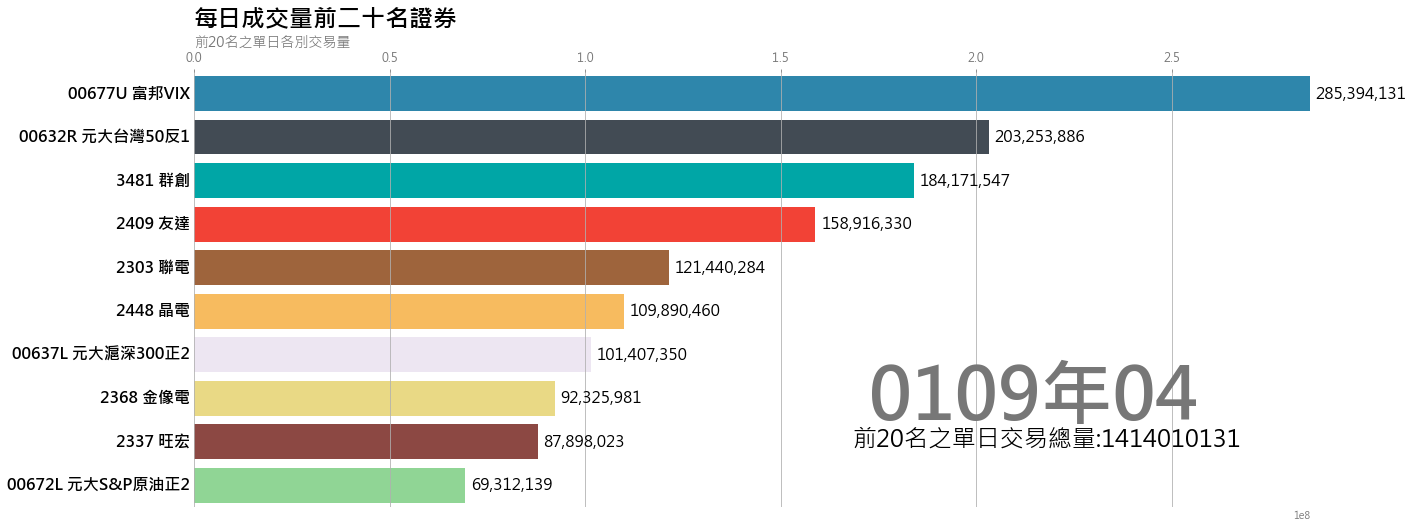

In [114]:
from matplotlib.animation import FuncAnimation
month = list(set(df.Date.values))
month.sort()

fig, ax = plt.subplots(figsize=(20, 8))
animator = animation.FuncAnimation(fig, race_barchart, frames=month)
HTML(animator.to_jshtml())

In [115]:
def __init__(self, *args, **kwargs):

        initial = kwargs.get('initial') or {}
        instance = kwargs.get('instance')
        if instance:
            if instance.is_md:
                initial['content_md'] = instance.content
            else:
                initial['content_ck'] = instance.content
        kwargs.update({'instance':instance,'initial':initial})
        super().__init__(*args,**kwargs)

animation.PillowWriter("C:/Users/User/Desktop/前二十股市變動量.gif")